<a href="https://colab.research.google.com/github/Sawera123a/Tea-Leaf-Disease-Classification/blob/main/TeaLeaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 2: Import necessary libraries
import tensorflow as tf #AI model building aur training ke liye
import numpy as np #AI models banane ke liye
import matplotlib.pyplot as plt # graphs plot karne ke liye

In [ ]:
# Step 3: Load dataset from directory structure
IMG_SIZE = (224, 224)
BATCH = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tea sickness dataset',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical' #multi-class classification ke liye hota hai
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tea sickness dataset',
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='categorical'
)

Found 29 files belonging to 2 classes.
Found 29 files belonging to 2 classes.


In [ ]:
# Step 4: Data augmentation and normalization
# Normalization – pixel values ko 0-1 range me laata hai
# Data augmentation –images ko randomly flip, rotate, zoom karta hai taake model zyada generalized ho
normalization = tf.keras.layers.Rescaling(1./255)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(normalization(x)), y)) #train_ds.map function ye transformations apply karta hai dataset par
val_ds = val_ds.map(lambda x, y: (normalization(x), y))

In [ ]:
# Step 5: Transfer Learning with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  #  iska matlab pretrained layers freeze kar diye gaye hain

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_ds.element_spec[1].shape[-1], activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Step 6: Model training
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.1034 - loss: 1.6704 - val_accuracy: 0.4483 - val_loss: 0.8341
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4828 - loss: 0.9049 - val_accuracy: 0.8621 - val_loss: 0.4008
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7931 - loss: 0.3836 - val_accuracy: 1.0000 - val_loss: 0.1795
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9310 - loss: 0.1997 - val_accuracy: 1.0000 - val_loss: 0.0798
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0933 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0169 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0230 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 9/10
1/1

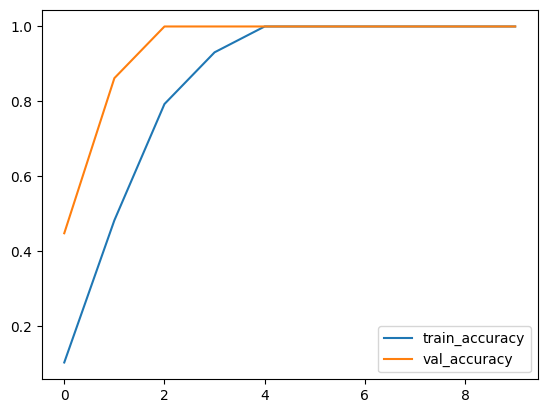

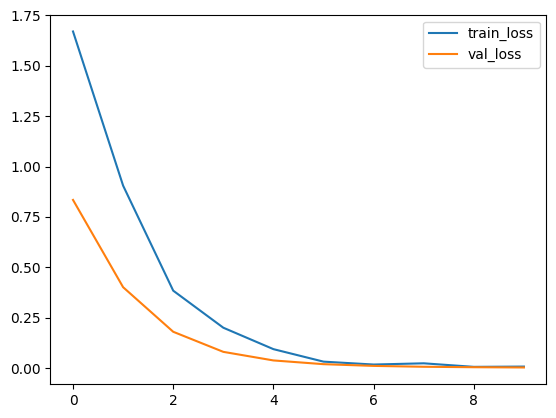

In [ ]:
# Step 7: Plot accuracy and loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# Step 9: Save model
model.save('/content/tea_leaf_classifier.h5')

# Evaluate
val_loss, val_acc = model.evaluate(val_ds)

print(f"Validation Accuracy: {val_acc*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0023
Validation Accuracy: 100.00%


Found 29 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: algal leaf


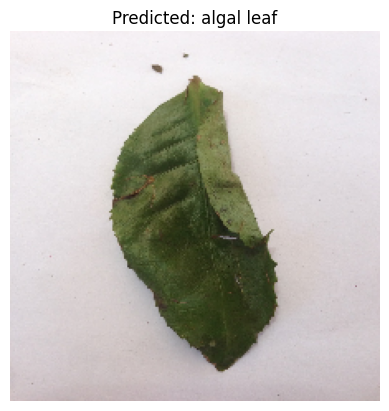

In [ ]:
# STEP A: Extract class names once

temp_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tea sickness dataset',
    image_size=(224,224),
    batch_size=32,
    label_mode='categorical'
)
class_names = temp_ds.class_names

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 👇 Path ko output of !ls se confirm karke yahan paste karo
img_path = '/content/drive/MyDrive/tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_10.jpg'

# Load and preprocess
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

pred = model.predict(img_array)
print("Predicted Class:", class_names[np.argmax(pred)])

plt.imshow(img)
plt.title(f"Predicted: {class_names[np.argmax(pred)]}")
plt.axis('off')
plt.show()
